<a href="https://colab.research.google.com/github/hemraj4545/Projects/blob/master/COVID_19_Epitope_Prediction/COVID_19_SARS_B_cell_Epitope_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bcell = pd.read_csv("input_bcell.csv", nrows=25000)
covid = pd.read_csv("input_covid.csv", nrows=25000)
sars = pd.read_csv("input_sars.csv")

This contains three data files:

    input_bcell.csv : this is our main training data. The number of rows is 14387 for all combinations of 14362 peptides and 757 proteins.
    input_sars.csv : this is also our main training data. The number of rows is 520.
    input_covid.csv : this is our target data. there is no label data in columns.

All of three datasets consists of information of protein and peptide:

    parent_protein_id : parent protein ID
    protein_seq : parent protein sequence
    start_position : start position of peptide
    end_position : end position of peptide
    peptide_seq : peptide sequence
    chou_fasman : peptide feature, $\beta$ turn
    emini : peptide feature, relative surface accessibility
    kolaskar_tongaonkar : peptide feature, antigenicity
    parker : peptide feature, hydrophobicity
    isoelectric_point : protein feature
    aromaticity: protein feature
    hydrophobicity : protein feature
    stability : protein feature

and bcell and sars dataset have antibody valence(target value):

    target : antibody valence (target value)


## Chou and Fasman beta turn prediction

- Reference: [Chou PY, Fasman GD. Prediction of the secondary structure of proteins from their amino acid sequence. Adv Enzymol Relat Areas Mol Biol. 1978;47:45-148.](http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?cmd=Retrieve&db=pubmed&dopt=Abstract&list_uids=364941)

- Description: The rationale for predicting turns to predict antibody epitopes is based on the paper by [Pellequer et al, Immunology Letters, 36 (1993) 83-99.](http://www.ncbi.nlm.nih.gov/pubmed/7688347) Instead of implementing the turn scale of that paper which has some non-standard properties, we decided to use the Chou and Fasman scale which is commonly used to predict beta turns as described in the reference link above.

**Scale**

<table>
<thead>
							<tr>
								<th>A</th><th>C</th><th>D</th><th>E</th><th>F</th><th>G</th><th>H</th><th>I</th><th>K</th><th>L</th><th>M</th><th>N</th><th>P</th><th>Q</th><th>R</th><th>S</th><th>T</th><th>V</th><th>W</th><th>Y</th>
							</tr>
						</thead>
						<tr>
							<td>0.66</td><td>1.19</td><td>1.46</td><td>0.74</td><td>0.6</td><td>1.56</td><td>0.95</td><td>0.47</td><td>1.01</td><td>0.59</td><td>0.6</td><td>1.56</td><td>1.52</td><td>0.98</td><td>0.95</td><td>1.43</td><td>0.96</td><td>0.5</td><td>0.96</td><td>1.14</td>
						</tr>
					</table>

## Emini surface accessibility scale

- Reference: [Emini EA, Hughes JV, Perlow DS, Boger J. Induction of hepatitis A virus-neutralizing antibody by a virus-specific synthetic peptide. J Virol. 1985 Sep;55(3):836-9.](http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?cmd=Retrieve&db=pubmed&dopt=Abstract&list_uids=2991600)

- Description: The calculation was based on surface accessibility scale on a product instead of an addition within the window. The accessibility profile was obtained using the formulae Sn = (n+4+i) (0.37)-6 where Sn is the surface probability, dn is the fractional surface probability value, and i vary from 1 to 6. A hexapeptide sequence with Sn greater than 1.0 indicates an increased probability for being found on the surface.

**Scale**

<table>
<thead>
	<tr>
		<th>A</th><th>C</th><th>D</th><th>E</th><th>F</th><th>G</th><th>H</th><th>I</th><th>K</th><th>L</th><th>M</th><th>N</th><th>P</th><th>Q</th><th>R</th><th>S</th><th>T</th><th>V</th><th>W</th><th>Y</th>
	</tr>
</thead>
<tr>
	<td>0.49</td><td>0.26</td><td>0.81</td><td>0.84</td><td>0.42</td><td>0.48</td><td>0.66</td><td>0.34</td><td>0.97</td><td>0.4</td><td>0.48</td><td>0.78</td><td>0.75</td><td>0.84</td><td>0.95</td><td>0.65</td><td>0.7</td><td>0.36</td><td>0.51</td><td>0.76</td>
</tr>
</table>

## Karplus and Schulz flexibility scale

- Reference: Karplus PA, Schulz GE. Prediction of Chain Flexibility in Proteins - A tool for the Selection of Peptide Antigens. Naturwissenschafren 1985; 72:212-3.

- Description: In this method, flexibility scale based on mobility of protein segments on the basis of the known temperature B factors of the a-carbons of 31 proteins of known structure was constructed. The calculation based on a flexibility scale is similar to classical calculation, except that the center is the first amino acid of the six amino acids window length, and there are three scales for describing flexibility instead of a single one.

## Kolaskar and Tongaonkar antigenicity scale

- Reference: [Kolaskar AS, Tongaonkar PC. A semi-empirical method for prediction of antigenic determinants on protein antigens. FEBS Lett. 1990 Dec 10;276(1-2):172-4.](http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?cmd=Retrieve&db=pubmed&dopt=Abstract&list_uids=1702393)

- Description: A semi-empirical method which makes use of physicochemical properties of amino acid residues and their frequencies of occurrence in experimentally known segmental epitopes was developed to predict antigenic determinants on proteins. Application of this method to a large number of proteins has shown by the authors that the method can predict antigenic determinants with about 75% accuracy which is better than most of the known methods.

**Scale**

<table>
						<thead>
							<tr>
								<th>A</th><th>C</th><th>D</th><th>E</th><th>F</th><th>G</th><th>H</th><th>I</th><th>K</th><th>L</th><th>M</th><th>N</th><th>P</th><th>Q</th><th>R</th><th>S</th><th>T</th><th>V</th><th>W</th><th>Y</th>
							</tr>
						</thead>
						<tr>
							<td>1.064</td><td>1.412</td><td>0.866</td><td>0.851</td><td>1.091</td><td>0.874</td><td>1.105</td><td>1.152</td><td>0.93</td><td>1.25</td><td>0.826</td><td>0.776</td><td>1.064</td><td>1.015</td><td>0.873</td><td>1.012</td><td>0.909</td><td>1.383</td><td>0.893</td><td>1.161</td> 
						</tr>
					</table>

## Parker Hydrophilicity Prediction

- Reference: [Parker JM, Guo D, Hodges RS. New hydrophilicity scale derived from high-performance liquid chromatography peptide retention data: correlation of predicted surface residues with antigenicity and X-ray-derived accessible sites. Biochemistry. 1986 Sep 23; 25(19):5425-32.](http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?cmd=Retrieve&db=pubmed&dopt=Abstract&list_uids=2430611)

- Description: In this method, hydrophilic scale based on peptide retention times during high-performance liquid chromatography (HPLC) on a reversed-phase column was constructed. A window of seven residues was used for analyzing epitope region. The corresponding value of the scale was introduced for each of the seven residues and the arithmetical mean of the seven residue value was assigned to the fourth, (i+3), residue in the segment.

**Scale**
<table>
						<thead>
							<tr>
								<th>A</th><th>C</th><th>D</th><th>E</th><th>F</th><th>G</th><th>H</th><th>I</th><th>K</th><th>L</th><th>M</th><th>N</th><th>P</th><th>Q</th><th>R</th><th>S</th><th>T</th><th>V</th><th>W</th><th>Y</th>
							</tr>
						</thead>
						<tr>
							<td>2.1</td><td>1.4</td><td>10.0</td><td>7.8</td><td>-9.2</td><td>5.7</td><td>2.1</td><td>-8.0</td><td>5.7</td><td>-9.2</td><td>-4.2</td><td>7.0</td><td>2.1</td><td>6.0</td><td>4.2</td><td>6.5</td><td>5.2</td><td>-3.7</td><td>-10.0</td><td>-1.9</td>
						</tr>
					</table>

## Isoelectric Point

![](https://www.antibodysociety.org/wordpress/wp-content/uploads/2015/06/background-300x300.jpg)

One important characteristic of monoclonal antibodies (mAbs) is their isoelectric point (pI), which essentially is the pH at which the antibody has no net electrical charge, and its value depends on the charged amino acids the antibody contains. If the pH of the surrounding environment is below the antibody’s pI, then the molecule carries a net positive charge, whereas the antibody will carry a net negative charge when the pH is above the pI.

# Reference :

- [B-Cell Help](http://tools.iedb.org/bcell/help/)
- [Importance Isoelectric Point of Antibodies](https://www.antibodysociety.org/new-articles/importance-isoelectric-point-pi-antibodies/)

## Task : SARS prediction with B-cell data

### Task Details

Our purpose is estimating the epitope region of SARS-CoV by only analyzing the B-cell dataset.

We are addressed the problem of classifying peptides into two categories in this task: antibodies with inducing properties (positive) and antibodies without inducing properties (negative), similar to the paper we have published.

Using the data provided, predict the antibody valence of the SARS-CoV data. It has a target value, so you can experiment and train normally to develop a model.
Evaluation

    Area Under the Curve(AUC)
        AUC of epitope prediction for SARS using the Bcell dataset as the training set and the SARS dataset as the test set.

    Documentation Quality
        Reusable and easy-to-understand code


In [3]:
bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [4]:
sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [5]:
covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [6]:
print("Shape of SARS : ", sars.shape)
print("Shape of B-Cell : ", bcell.shape)
print("Shape of COVID : ", covid.shape)

Shape of SARS :  (520, 14)
Shape of B-Cell :  (14387, 14)
Shape of COVID :  (20312, 13)


As we are going to train the data of SARS and B-Cell, we will combine the data of both as one and put them into a model to interprete in the training data(COVID data).

In [7]:
# Combining two columns with same column name
bcell_sars = bcell.append(sars, ignore_index=True)

In [8]:
bcell_sars.shape

(14907, 14)

In [9]:
bcell_sars.head(20)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1
5,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,155,159,GLQKV,0.928,0.547,1.090,0.90,6.867493,0.103846,-0.578846,21.684615,1
6,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,22,26,IAKGE,0.888,0.633,0.974,2.66,6.867493,0.103846,-0.578846,21.684615,1
7,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,253,257,RQIKA,0.814,1.252,1.007,2.00,6.867493,0.103846,-0.578846,21.684615,1
8,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,218,222,SSEQV,1.016,1.042,1.055,4.62,6.867493,0.103846,-0.578846,21.684615,1
9,P01012,MGSIGAASMEFCFDVFKELKVHHANENIFYCPIAIMSALAMVYLGA...,261,265,NFEKL,0.900,1.301,0.980,0.42,5.193909,0.085492,-0.001036,37.108575,1


In [10]:
bcell_sars.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000
mean,308.845173,319.519420,0.994906,1.082811,1.021808,1.750098,7.015227,0.077143,-0.394063,43.337674,0.271148
std,358.433563,358.647859,0.123656,1.826098,0.053430,1.954424,1.875713,0.026388,0.392808,16.501627,0.444567
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,86.000000,96.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000
50%,197.000000,208.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.948275,0.000000
75%,400.000000,411.000000,1.073000,1.208500,1.055000,2.960000,8.676575,0.093458,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [11]:
bcell_sars.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 12.7 MB


In [12]:
bcell_sars[bcell_sars.isna().any(axis=1)]

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target


As there are no data missing, we can proceed without data cleaning process.

In [13]:
bcell_sars.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [14]:
features = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']
labels = ['target']

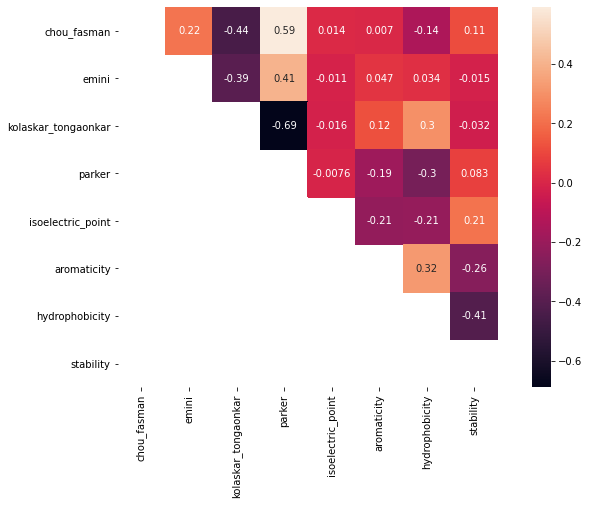

In [15]:
corr = bcell_sars[features].corr()

fig = plt.figure(figsize=(12,7))
sns.heatmap(corr,
            annot=True,
            square=True,
            mask = np.tril(corr))
plt.show()

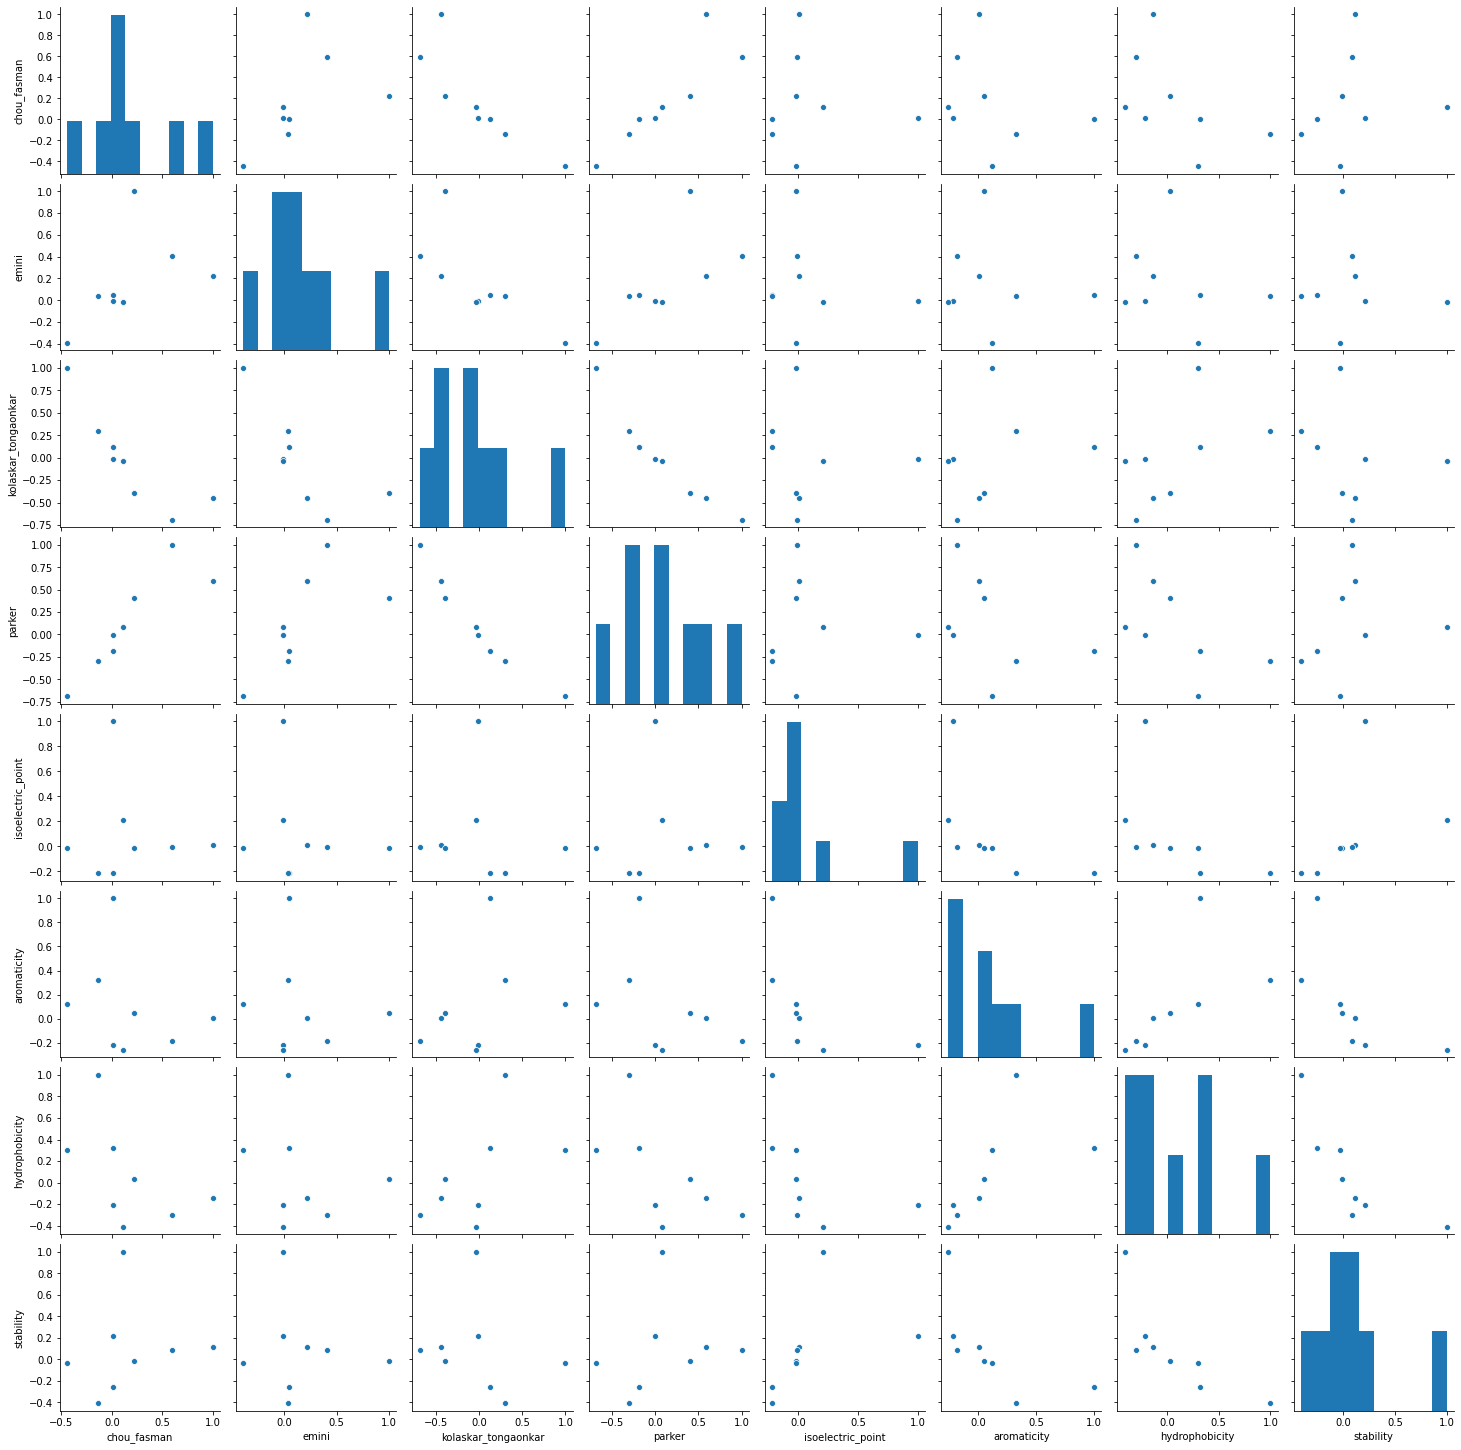

In [16]:
sns.pairplot(corr)

### Machine Learning Models

In [57]:
# Assigning train and test data

X_train, Y_train = bcell_sars[features], bcell_sars[labels]

# As covid dataset doesn't provide data for the target, we need to find them
X_test = covid[features]     

In [58]:
# Importing the models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Logistic Regression

In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Stochastic Gradient Descent (SGD):

In [59]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest:

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### K Nearest Neighbor:

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Gaussian Naive Bayes:

In [63]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Perceptron:

In [64]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


### Linear Support Vector Machine:

In [65]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Decision Tree

In [66]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Best Model

In [102]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df.style.hide_index()

Model,Score
Random Forest,99.870000
Decision Tree,99.870000
KNN,88.040000
Logistic Regression,73.330000
Stochastic Gradient Decent,73.130000
Support Vector Machines,73.010000
Perceptron,72.930000
Naive Bayes,71.950000


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

### K-Fold Validation

In [128]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, 
                         Y_train, cv=3, 
                         scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Scores: [0.43348762 0.32823506 0.38619441]
Mean: 0.3826390286442611
Standard Deviation: 0.04304266244111728


In [109]:
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',
                                      ascending=False).set_index('feature')

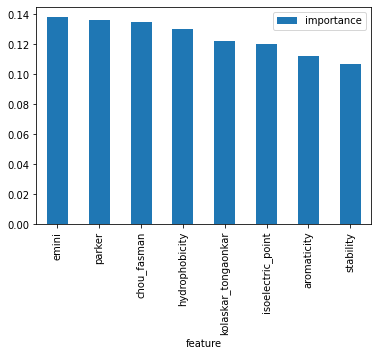

In [110]:
importances.plot.bar()

### Confusion Matrix

In [116]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([[3066, 7799],
       [1571, 2471]])

### precision and recall

In [117]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.24060370009737098
Recall: 0.6113310242454231


Our model predicts 24% of the time, a person have corona correctly (precision). The recall tells us that it predicted the survival of 61 % of the people who actually have Corona.

### F-Score

In [129]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.34530463946338735

There we have it, a 35% F-score. The score is not that high, because we have a recall of 61%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff.

### Precision Recall Curve

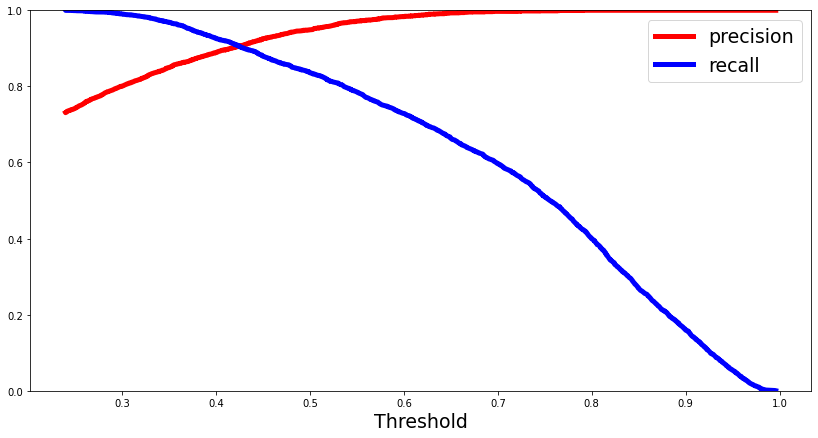

In [131]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, 
                                                      y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

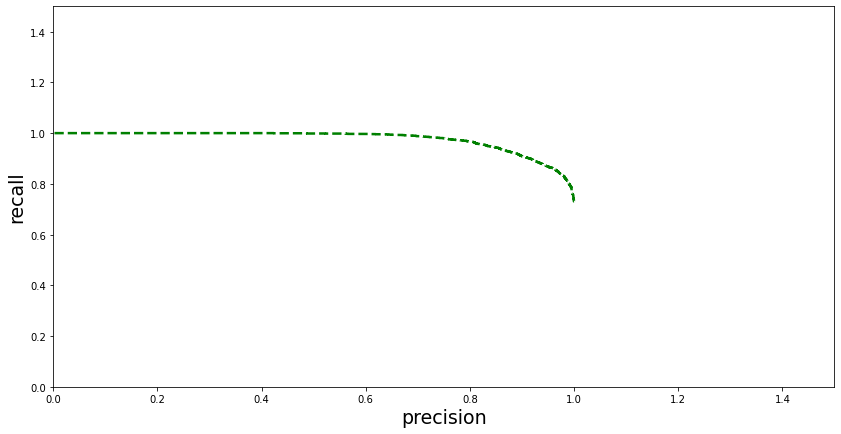

In [132]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

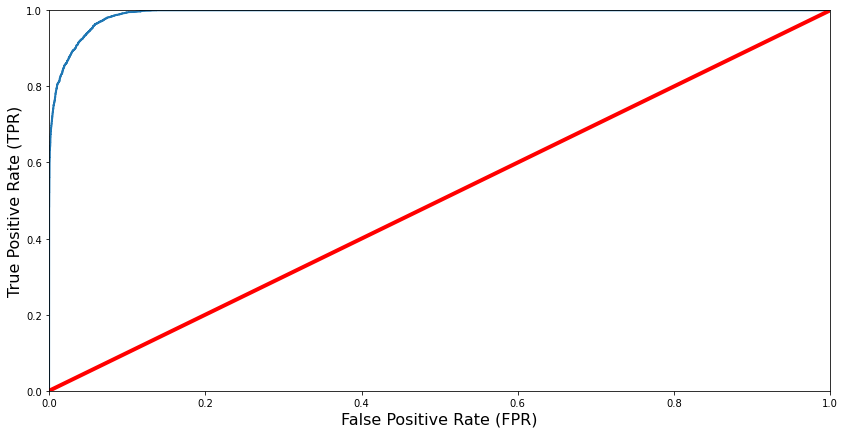

In [133]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [134]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9912764454588988
